# Gradient Descent for Linear Regression

Create an instance (lr) of Linear_regression(df, alpha, lamb), which takes in a dataframe (df) with any n of x-features (variables), the learning rate (alpha), and regularization rate lambda (lamb):

lr = Linear_regression(df, alpha, lamb)

lr.gradient_descent() 

In [1]:
import math
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [2]:
df = pd.read_csv('ex1data2.txt',sep=",",names=('x1','x2','y'))
df.head()

,x1,x2,y
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [5]:
class Linear_regression:
    def __init__(self, df, alpha, lamb):
        self.df = df
        self.alpha = alpha
        self.lamb = lamb
        self.cost_list = []
        self.theta_list = []
    
    def gradient_descent(self):

        # Initiate with tranposed theta. theta_t = arr[1,1,1...1] with a length of x-features, including x0.
        if len(self.theta_list)>0:
            theta_t = np.array(self.theta_list[-1]).reshape(1,len(self.df.columns))
        else:
            theta_t = np.ones(len(self.df.columns)).reshape(1,len(self.df.columns))
            self.theta_list.append([1]*len(self.df.columns))

        # xy_list = [(x1, x2, ... xn, y)...] 
        xy_list = [list(item[1:]) for item in self.df.itertuples()]

        # Add x0 = 1 (bias term) to every data point.  xy_list becomes [(1,x1,x2,...xn,y), ...] 
        for point in xy_list:
            point.insert(0,1) 

        # x_features = [(1,x1,x2...xn), (1,x1,x2...xn)...]
        x_features = [coord[0:-1] for coord in xy_list]

        # Normalize x_features (x0,x1,x2) <--- start at x1 (self.df[0]), because x0 = bias term 1 
        # (x1-x1mean)/x1.stdev
        for x_set in x_features:
            i=0
            for x in x_set[1:]:
                x = (x - statistics.mean(self.df[self.df.columns[i]])) / statistics.stdev(self.df[self.df.columns[i]])
                x_set[i+1] = x
                i=i+1

        # y_class = [y1, y2...yn]
        y_class = [coord[-1] for coord in xy_list]

        # Cost Function J
        errorsq_list = []
        i = 0
        for x_set in x_features:
            # math domain error if 1-sig_fn = 0
            errorsq_term = (np.matmul(theta_t,np.array(x_set).reshape(len(self.df.columns),1)) - y_class[i])**2
            errorsq_list.append(errorsq_term)
            i = i+1
        j = (1/(2*len(self.df)))*sum(errorsq_list)
        self.cost_list.append(j)

        # Gradient Descent
        diff_list = []
        i=0
        for x_set in x_features:
            error_term = np.matmul(theta_t,np.array(x_set).reshape(len(self.df.columns),1))-y_class[i]
            diff_list.append(error_term[0][0])
            i=i+1

        # [(error_term(1)x0(1)), (error_term(1)x1(1)), (error_term(1)x2(1)), (error_term(2)x0(2))...]
        diff_partial_x = []
        i=0
        for x_set in x_features:
            for x in x_set:
                diff_partial_x.append(diff_list[i]*x)
            i=i+1

        # Update thetas (need additional indexing for iterating through a numpy array)
        updated_thetas = []
        i = 0 

        # Add every error term with the same partial x
        for theta in theta_t[0]:
            theta = (theta*(1-(self.alpha*self.lamb/len(self.df))))-(self.alpha/len(self.df))*sum(diff_partial_x[i::len(self.df.columns)])          
            updated_thetas.append(theta)
            i = i + 1
        # De-regularize theta[0] as we don't want to penalize theta_0.   
        updated_thetas[0] = updated_thetas[0] + (self.alpha/len(self.df))*sum(diff_partial_x[0::len(self.df.columns)])
        updated_thetas[0] = updated_thetas[0]/(1-(self.alpha*self.lamb/len(self.df))) - (self.alpha/len(self.df))*sum(diff_partial_x[0::len(self.df.columns)])

        # Add updated thetas to self.theta_list
        self.theta_list.append(updated_thetas)

        # Recursively run until cost is minimized
        if len(self.cost_list)<2: 
            Linear_regression.gradient_descent(self)
        elif len(self.cost_list)>=2 and self.cost_list[-1]<self.cost_list[-2]:
            Linear_regression.gradient_descent(self)
        elif len(self.cost_list)>=2 and self.cost_list[-1]>=self.cost_list[-2]:
            # Report results
            print(f'There were {len(self.cost_list)} recursive cycles before the cost was minimized to {self.cost_list[-1]}.')
            print(f'Updated thetas: {self.theta_list[-1]}')

            # Create lists of predicted Y values using the new hypothesis
            theta_init = np.ones(shape=(1,len(self.df.columns)))
            initial_line = []
            for x_set in x_features:
                x_set = np.array(x_set).reshape(len(self.df.columns),1)
                initial_line.append(np.matmul(theta_init,x_set))
            initial_line = np.array(initial_line).reshape(1,len(self.df))
            initial_line_uni = np.array(initial_line).reshape(len(self.df))

            mid_thetas = np.array(self.theta_list[3]).reshape(1,len(self.df.columns))
            mid_line = []
            for x_set in x_features:
                x_set = np.array(x_set).reshape(len(self.df.columns),1)
                mid_line.append(np.matmul(mid_thetas,x_set))
            mid_line = np.array(mid_line).reshape(1,len(self.df))
            mid_line_uni = np.array(mid_line).reshape(len(self.df))
            
            predicted_y = []
            for x_set in x_features:
                updated_thetas = np.array(updated_thetas).reshape(1,len(self.df.columns))
                x_set = np.array(x_set).reshape(len(self.df.columns),1)
                predicted_y.append(np.matmul(updated_thetas,x_set))
            predicted_y = np.array(predicted_y).reshape(1,len(self.df))
            predicted_y_uni = np.array(predicted_y).reshape(len(self.df))
            
            # Plot hypothesis for 2-variable Dataframe 
            if len(self.df.columns)==3:
                x0 = [x_set[0] for x_set in x_features]
                x1 = [x_set[1] for x_set in x_features]
                x2 = [x_set[2] for x_set in x_features]            
                cost = [j[0][0] for j in self.cost_list]
                x_cycles = np.arange(0,len(self.cost_list),1)
                
                # Plot the (X1, X2, predicted_Y) with the new h(x)
                fig = plt.figure(figsize=(14,6))
                fig.subplots_adjust(wspace=0.3)

                ax = fig.add_subplot(1,2,1,projection='3d')
                p = ax.scatter(x1, x2, y_class, linewidth=1, color='r')
                p = ax.plot_wireframe(x1,x2,predicted_y)
                p = ax.plot_wireframe(x1,x2,initial_line)
                p = ax.plot_wireframe(x1,x2,mid_line)
                ax.set_xlabel("X1")
                ax.set_ylabel("X2")
                ax.set_zlabel("Y")
                ax.set_title("Line/Mesh of Best Fit")

                # Plot Cost Function J(t0,t1) vs. Cycles
                x_cycles = np.arange(0,len(self.cost_list),1)
                ax = fig.add_subplot(1,2,2)
                ax.set_xlabel('Cycles')
                ax.set_ylabel('J')
                ax.set_title('Cost per Cycle')
                ax.plot(x_cycles, cost, linewidth=1)
            
            # Plot hypothesis for 1-variable dataframe
            elif len(self.df.columns)==2:
                x0 = [x_set[0] for x_set in x_features]
                x1 = [x_set[1] for x_set in x_features]
                #x1 = np.array(x1).reshape(1,len(self.df))
                cost = [j[0][0] for j in self.cost_list]
                x_cycles = np.arange(0,len(self.cost_list),1)
                # Plot the (X1, predicted_Y) with the new h(x)
                fig = plt.figure(figsize=(14,6))
                fig.subplots_adjust(wspace=0.3)
                ax = fig.add_subplot(1,2,1)
                ax.scatter(x1,y_class,linewidth=1,color='r')
                ax.plot(x1,predicted_y_uni,color='b')
                ax.plot(x1,initial_line_uni,color='b')
                ax.plot(x1,mid_line_uni,color='b')
                ax.set_xlabel("X1")
                ax.set_ylabel("Y")
                ax.set_title("Line of best fit")

                # Plot Cost Function J(t0,t1) vs. Cycles
                x_cycles = np.arange(0,len(self.cost_list),1)
                ax = fig.add_subplot(1,2,2)
                ax.set_xlabel('Cycles')
                ax.set_ylabel('J')
                ax.set_title('Cost per Cycle')
                ax.plot(x_cycles, cost, linewidth=1)

## Multivariate example

There were 325 recursive cycles before the cost was minimized to [[2.04734184e+09]].
Updated thetas: [340412.659574468, 107155.83878156329, -4603.395978581559]


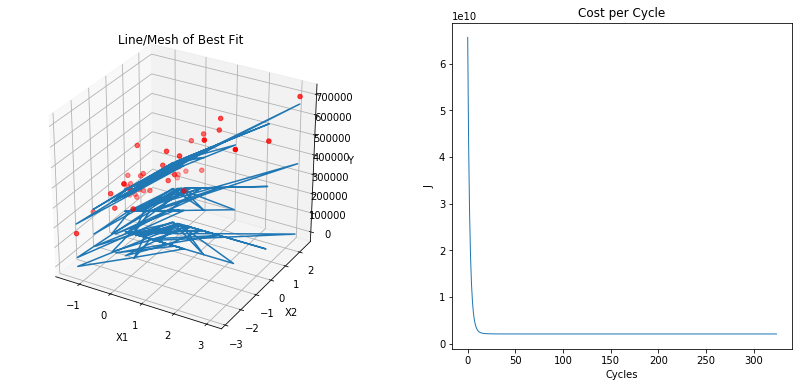

In [6]:
lr = Linear_regression(df, alpha=0.2, lamb=1)
lr.gradient_descent()

## Univariate example

In [7]:
df_uni = pd.read_csv('ex1data1.txt',sep=",",names=('x1','y'))
df_uni.head()

,x1,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


There were 139 recursive cycles before the cost was minimized to [[4.47809243]].
Updated thetas: [5.839135051546229, 4.5693043277776]


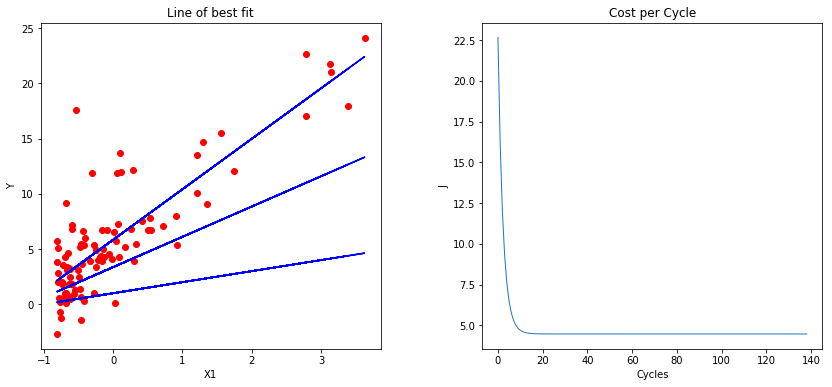

In [8]:
lr_uni = Linear_regression(df_uni, alpha=0.2, lamb=1)
lr_uni.gradient_descent()